In [1]:
# pip install xgboost lightgbm

In [2]:
# !pip install --upgrade tensorflow

In [3]:
# pip install numpy pandas seaborn matplotlib nltk sklearn wordcloud bs4 keras tensorflow

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import PorterStemmer,WordNetLemmatizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import xgboost as xgb
import lightgbm as lgb
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import text
from sklearn.metrics import classification_report


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amro7\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
true = pd.read_csv(r"True.csv")
false = pd.read_csv(r"Fake.csv")

In [4]:
true.head()


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
false.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
true['category'] = 1
false['category'] = 0

In [7]:
true.head()


,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [8]:
df = pd.concat([true,false]) 

In [9]:
df.isna().sum()


title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [10]:
df.title.count()


44898

In [11]:
df.subject.value_counts()


politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [12]:
# df['text'] = df['text'] + " " + df['title'] + " " + df['subject']
del df['title']
del df['subject']
del df['date']

In [13]:
df.head()


,text,category
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [14]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [15]:
stop

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'need

In [16]:
stemmer = PorterStemmer()
# def stem_text(text):
#     final_text = []
#     for i in text.split():
#         if i.strip().lower() not in stop:
#             # word = stemmer.stem(i.strip())
#             word = i.strip().lower()
#             final_text.append(word)
#     return " ".join(final_text)    

# conver to lower case and remove stop words 
def clean_text(text):
    text = text.lower()
    text = text.split()
    text = [word for word in text if word not in stop]
    text = " ".join(text)
    return text

In [17]:
# df.text = df.text.apply(stem_text)
df.text = df.text.apply(clean_text)

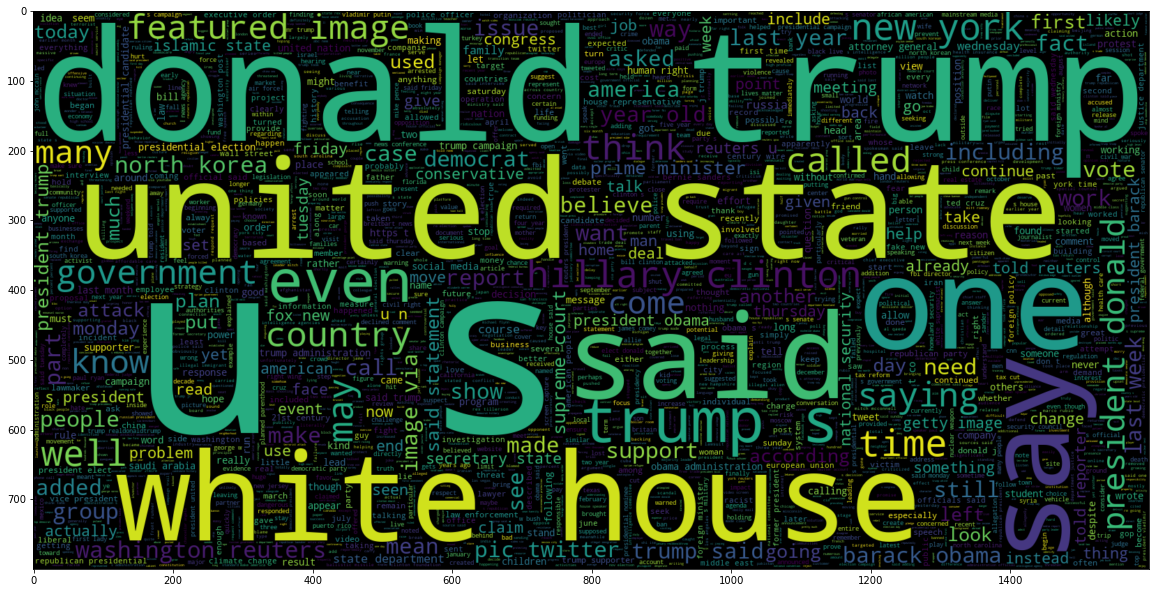

In [17]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df.text))
plt.imshow(wc , interpolation = 'bilinear')

In [18]:
vectorizer = TfidfVectorizer(
            norm='l2',
            max_features=1800
            )
X = vectorizer.fit_transform(df.text).toarray()

In [19]:
from joblib import dump, load
dump(vectorizer, 'vectorizer.joblib')

['vectorizer.joblib']

In [25]:
x_train,x_test,y_train,y_test = train_test_split(X ,df.category)

In [ ]:
# X_train = vectorizer.fit_transform(x_train).toarray()
# X_test = vectorizer.fit_transform(x_test).tarray()

In [26]:

print('BOW_cv_train:', x_train.shape)
print('BOW_cv_test:', x_test.shape)
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim = x_train.shape[1]))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=25, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)


BOW_cv_train: (33673, 1800)
BOW_cv_test: (11225, 1800)
Epoch 1/5
1053/1053 [==============================] - 4s 3ms/step - loss: 0.0738 - accuracy: 0.9743
Epoch 2/5
1053/1053 [==============================] - 3s 3ms/step - loss: 0.0168 - accuracy: 0.9950
Epoch 3/5
1053/1053 [==============================] - 3s 3ms/step - loss: 0.0100 - accuracy: 0.9971
Epoch 4/5
1053/1053 [==============================] - 3s 3ms/step - loss: 0.0069 - accuracy: 0.9979
Epoch 5/5
1053/1053 [==============================] - 3s 3ms/step - loss: 0.0046 - accuracy: 0.9983


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-01-25 14:52:59         2679
metadata.json                                  2023-01-25 14:52:59           64
variables.h5              

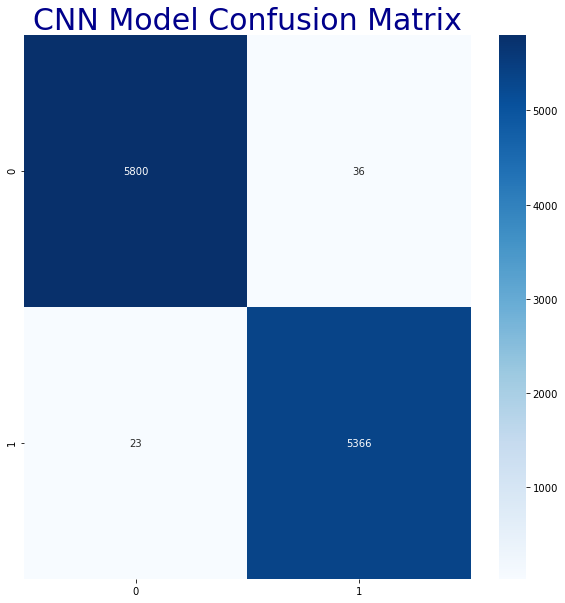

In [30]:
dump(model, 'CNN.model')
pred = (model.predict(x_test) > 0.7)
print(accuracy_score(pred, y_test))
cm_cv = confusion_matrix(pred, y_test)
plt.figure(figsize=(10, 10))
plt.title(label="CNN Model Confusion Matrix",
          fontsize=30,
          color="darkblue",)
sns.heatmap(cm_cv, cmap="Blues", annot=True, fmt='')
plt.show()

In [29]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

       False       1.00      0.99      0.99      5836
        True       0.99      1.00      0.99      5389

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [52]:
XGB_Classifier = xgb.XGBClassifier(learning_rate=0.5,
                                   n_estimators=100,
                                   max_depth=7,
                                   gamma=5,
                                   objective='binary:logistic',
                                   random_state=99
                                   )

Accuracy: 0.997327
Precision: 0.996830
Recall: 0.997574
F_measure: 0.997202
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5866
           1       1.00      1.00      1.00      5359

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



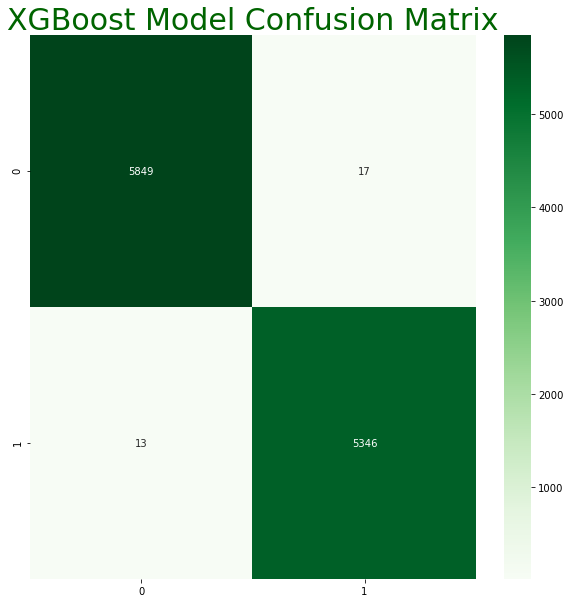

In [53]:
XGB_Classifier = XGB_Classifier.fit(x_train, y_train)
Xgb_pred = XGB_Classifier.predict(x_test).astype(int)
Xgb_accuracy = accuracy_score(y_test, Xgb_pred)
Xgb_precision = precision_score(y_test, Xgb_pred)
Xgb_recall = recall_score(y_test, Xgb_pred)
Xgb_F_measure = f1_score(y_test, Xgb_pred)
print("Accuracy: %f" % Xgb_accuracy)
print("Precision: %f" % Xgb_precision)
print("Recall: %f" % Xgb_recall)
print("F_measure: %f" % Xgb_F_measure)
Xgb_report = classification_report(y_test, Xgb_pred)
print(Xgb_report)
cm_cv = confusion_matrix(y_test, Xgb_pred)
plt.figure(figsize=(10, 10))
plt.title(label="XGBoost Model Confusion Matrix",
          fontsize=30,
          color="darkgreen")
sns.heatmap(cm_cv, cmap="Greens", annot=True, fmt='')
plt.show()


import pickle

# Save the trained model to a file
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(XGB_Classifier, f)

In [23]:
# create new xgboost model
model = xgb.XGBClassifier()

# import cross validation
from sklearn.model_selection import cross_val_predict

# cross validation
y_pred = cross_val_predict(model, X, df.category, cv=5, n_jobs=-1)

0.9964586395830549
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23481
           1       0.99      1.00      1.00     21417

    accuracy                           1.00     44898
   macro avg       1.00      1.00      1.00     44898
weighted avg       1.00      1.00      1.00     44898

[[23367   114]
 [   45 21372]]


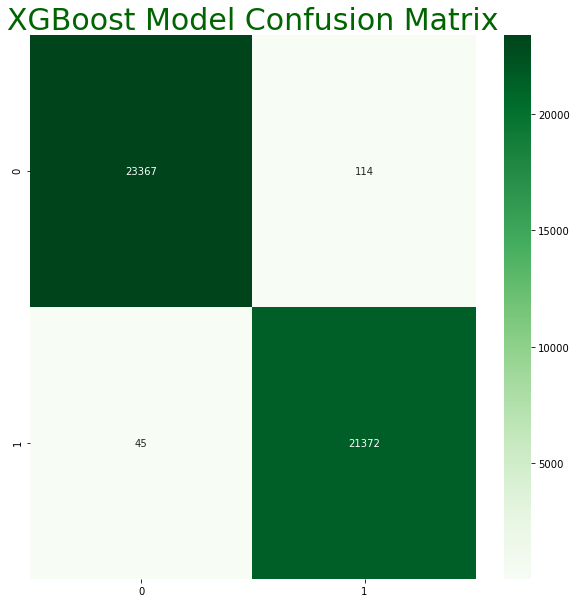

In [24]:
# print accuracy score
print(accuracy_score(df.category, y_pred))

# print classification report
print(classification_report(df.category, y_pred))

# print confusion matrix
print(confusion_matrix(df.category, y_pred))
XGB_Con = confusion_matrix(df.category, y_pred)
# print heatmap
plt.figure(figsize=(10, 10))
plt.title(label="XGBoost Model Confusion Matrix",
          fontsize=30,
          color="darkgreen")
sns.heatmap(XGB_Con, cmap="Greens", annot=True, fmt='')
plt.show()




In [21]:
# create new lightgbm model
model = lgb.LGBMClassifier()

# import cross validation
from sklearn.model_selection import cross_val_predict

# cross validation
y_pred = cross_val_predict(model, X, df.category, cv=5, n_jobs=-1)

0.9962581852198317
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     23481
           1       0.99      1.00      1.00     21417

    accuracy                           1.00     44898
   macro avg       1.00      1.00      1.00     44898
weighted avg       1.00      1.00      1.00     44898

[[23361   120]
 [   48 21369]]


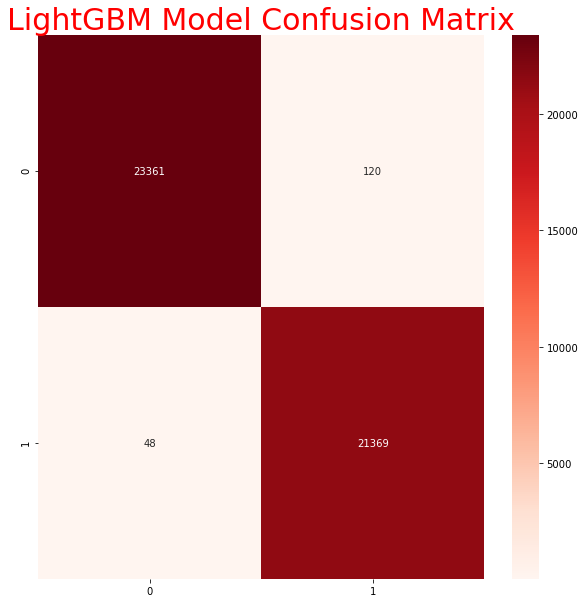

In [22]:
# print accuracy score
print(accuracy_score(df.category, y_pred))

# print classification report
print(classification_report(df.category, y_pred))

# print confusion matrix
lgb_cm = confusion_matrix(df.category, y_pred)
print(lgb_cm)


# print heatmap according to confusion matrix
plt.figure(figsize=(10, 10))
plt.title(label="LightGBM Model Confusion Matrix",
            fontsize=30,
            color="red")
sns.heatmap(lgb_cm, cmap="Reds", annot=True, fmt='')
plt.show()